# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime, date
from numpy import sqrt, sin, cos, arcsin, arccos, radians, abs

# Import data

In [2]:
missing_data = pd.read_csv('./missing_data.csv')
warehouses_data = pd.read_csv('./warehouses.csv')

# Check for null

In [3]:
missing_data.isna().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                10
shopping_cart                     0
order_price                      10
delivery_charges                  0
customer_lat                     10
customer_long                    10
coupon_discount                   0
order_total                      10
season                           10
is_expedited_delivery             0
distance_to_nearest_warehouse    10
latest_customer_review            0
is_happy_customer                10
dtype: int64

In [4]:
labels = missing_data.columns
for count in range(len(labels)):
        print('NaN index check list of {}:\n{}'.format(labels[count], [i for i in range(len(missing_data)) if missing_data.loc[:,labels[count]].isnull()[i]]))

NaN index check list of order_id:
[]
NaN index check list of customer_id:
[]
NaN index check list of date:
[]
NaN index check list of nearest_warehouse:
[7, 16, 105, 219, 236, 247, 251, 292, 295, 416]
NaN index check list of shopping_cart:
[]
NaN index check list of order_price:
[19, 40, 84, 145, 170, 257, 273, 343, 425, 431]
NaN index check list of delivery_charges:
[]
NaN index check list of customer_lat:
[25, 75, 133, 189, 192, 203, 224, 324, 398, 460]
NaN index check list of customer_long:
[96, 143, 155, 165, 231, 252, 363, 370, 376, 452]
NaN index check list of coupon_discount:
[]
NaN index check list of order_total:
[26, 73, 131, 202, 210, 248, 259, 345, 430, 480]
NaN index check list of season:
[2, 76, 110, 132, 135, 173, 209, 310, 335, 442]
NaN index check list of is_expedited_delivery:
[]
NaN index check list of distance_to_nearest_warehouse:
[39, 184, 191, 263, 270, 281, 326, 347, 385, 392]
NaN index check list of latest_customer_review:
[]
NaN index check list of is_happy_cu

# Check for Order ID

In [5]:
print(f'Order id is unique: {missing_data.order_id.is_unique}')

Order id is unique: True


# Check for Customer ID

In [6]:
print(f'Customer id is unique: {missing_data.customer_id.is_unique}')

Customer id is unique: False


In [7]:
missing_data['customer_id'].unique

<bound method Series.unique of 0      ID0289597187
1      ID1668523020
2      ID0370751503
3      ID0634774947
4      ID3313210924
           ...     
495    ID0711745634
496    ID3208518274
497    ID0589449505
498    ID6167357842
499    ID0634783923
Name: customer_id, Length: 500, dtype: object>

# Check for Date

In [8]:
error_date_index = [i for i in range(len(missing_data)) if not missing_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[]


In [9]:
missing_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                      float64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                 object
dtype: object

In [10]:
missing_data['date'] = pd.to_datetime(missing_data['date'])

In [11]:
missing_data.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                             float64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                        object
dtype: object

# Check for Nearest warehouse

In [12]:
print(f'Nearest warehouse is unique: {missing_data.nearest_warehouse.is_unique}')

Nearest warehouse is unique: False


In [13]:
missing_data['nearest_warehouse'].unique()

array(['Thompson', 'Bakers', 'Nickolson', nan], dtype=object)

In [14]:
print(f"Number of null: {missing_data['nearest_warehouse'].isnull().sum()}")

Number of null: 10


In [15]:
nearest_warehouse_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'nearest_warehouse'].isna()[i]]
print(nearest_warehouse_nan_checklist)

[7, 16, 105, 219, 236, 247, 251, 292, 295, 416]


In [16]:
for i in nearest_warehouse_nan_checklist:
    [lat, lon] = missing_data.loc[i, ['customer_lat', 'customer_long']]
    distance = [np.arccos(np.sin(np.radians(lat))*np.sin(np.radians(warehouses_data.iloc[i,1])) 
                + np.cos(np.radians(lat))*np.cos(np.radians(warehouses_data.iloc[i,1]))*np.cos(np.radians(warehouses_data.iloc[i,2] - lon)))*6371 for i in range(3)]
    missing_data.loc[i, 'nearest_warehouse'] = warehouses_data.iloc[distance.index(min(distance)), 0]

In [17]:
print(f"Number of null: {missing_data['nearest_warehouse'].isnull().sum()}")

Number of null: 0


# Check for Distance to nearest warehouse

In [18]:
missing_data['distance_to_nearest_warehouse'].describe()

count    490.000000
mean       1.077335
std        0.509914
min        0.054900
25%        0.723625
50%        1.043350
75%        1.389525
max        3.138800
Name: distance_to_nearest_warehouse, dtype: float64

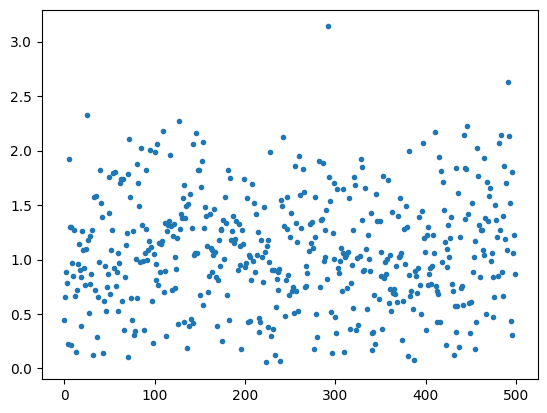

In [19]:
plt.plot(missing_data['distance_to_nearest_warehouse'], '.')

In [20]:
print(f"Number of null value: {missing_data['distance_to_nearest_warehouse'].isnull().sum()}")

Number of null value: 10


In [21]:
distance_to_nearest_warehouse_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'distance_to_nearest_warehouse'].isna()[i]]
print(distance_to_nearest_warehouse_nan_checklist)

[39, 184, 191, 263, 270, 281, 326, 347, 385, 392]


In [22]:
for i in distance_to_nearest_warehouse_nan_checklist:
    [lat1, lon1] = missing_data.loc[i, ['customer_lat', 'customer_long']]
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = round(2*6371*np.arcsin(sqrt(np.sin(np.radians((lat1 - lat2)/2))**2 
                     + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(np.radians((lon1-lon2)/2))**2)),4)
    missing_data.loc[i, 'distance_to_nearest_warehouse'] = distance

In [23]:
print(f"Number of null value: {missing_data['distance_to_nearest_warehouse'].isnull().sum()}")

Number of null value: 0


# Check for Order price

In [24]:
missing_data['order_price'].describe()

count      490.000000
mean     13217.867347
std       7552.951453
min        580.000000
25%       7140.000000
50%      12180.000000
75%      18327.500000
max      37300.000000
Name: order_price, dtype: float64

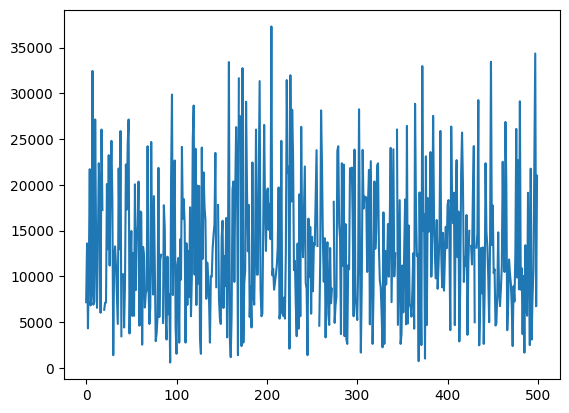

In [25]:
plt.plot(missing_data['order_price'])

In [26]:
print(f"Number of null value: {missing_data['order_price'].isnull().sum()}")

Number of null value: 10


In [27]:
order_price_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'order_price'].isna()[i]]
print(order_price_nan_checklist)

[19, 40, 84, 145, 170, 257, 273, 343, 425, 431]


In [28]:
'''
for i in order_price_nan_checklist:
    order_price = ((missing_data.loc[i, 'order_total'] - missing_data.loc[i, 'delivery_charges'])*100)/(100 - missing_data.loc[i, 'coupon_discount'])
    missing_data.loc[i, 'order_price'] = order_price
    print(i, order_price)'''
order_mean = missing_data['order_price'].mean()
for i in order_price_nan_checklist:
    missing_data.loc[i, 'order_price'] = order_mean

In [29]:
print(f"Number of null value: {missing_data['order_price'].isnull().sum()}")

Number of null value: 0


# Check for Order total

In [30]:
missing_data['order_total'].describe()

count      490.000000
mean     11939.841020
std       7032.605471
min        568.640000
25%       6486.542500
50%      10756.615000
75%      16315.555000
max      37362.470000
Name: order_total, dtype: float64

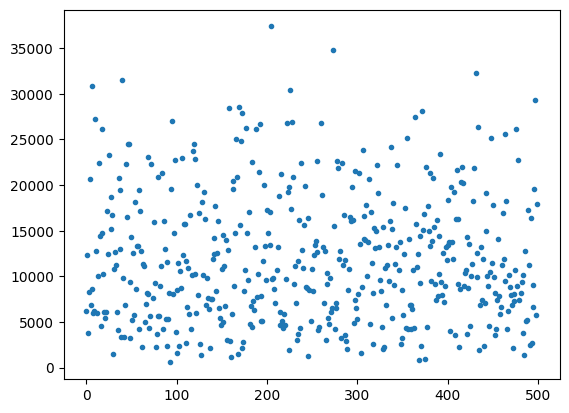

In [31]:
plt.plot(missing_data['order_total'], '.')

In [32]:
print(f"Number of null value: {missing_data['order_total'].isnull().sum()}")

Number of null value: 10


In [33]:
order_total_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'order_total'].isna()[i]]
print(order_total_nan_checklist)

[26, 73, 131, 202, 210, 248, 259, 345, 430, 480]


In [34]:
for i in order_total_nan_checklist:
    order_total = missing_data.loc[i, 'order_price']*(1 - missing_data.loc[i, 'coupon_discount']/100) + missing_data.loc[i, 'delivery_charges']
    missing_data.loc[i, 'order_total'] = order_total
    print(i, order_total)

26 9551.62
73 13353.84
131 13323.29
202 11414.07
210 9243.29
248 14713.63
259 10917.36
345 4752.05
430 4301.6
480 29219.84


In [35]:
print(f"Number of null value: {missing_data['order_total'].isnull().sum()}")

Number of null value: 0


# Check for season

In [36]:
missing_data['season'].describe()

count        490
unique         4
top       Spring
freq         131
Name: season, dtype: object

In [37]:
missing_data['season'].unique()

array(['Autumn', nan, 'Summer', 'Spring', 'Winter'], dtype=object)

In [38]:
missing_data.groupby('season')['date'].count()

season
Autumn    115
Spring    131
Summer    122
Winter    122
Name: date, dtype: int64

Text(0.5, 1.0, 'Winter')

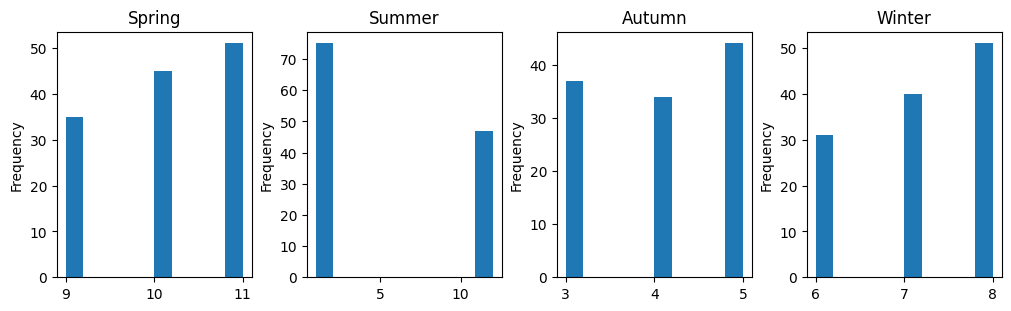

In [39]:
# Plot histogram of date group by seasons
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,4,1)
missing_data[missing_data['season'] == 'Spring']['date'].dt.month.plot.hist()
plt.title('Spring')
plt.subplot(1,4,2)
missing_data[missing_data['season'] == 'Summer']['date'].dt.month.plot.hist()
plt.title('Summer')
plt.subplot(1,4,3)
missing_data[missing_data['season'] == 'Autumn']['date'].dt.month.plot.hist()
plt.title('Autumn')
plt.subplot(1,4,4)
missing_data[missing_data['season'] == 'Winter']['date'].dt.month.plot.hist()
plt.title('Winter')

<Axes: title={'center': 'month'}, xlabel='[season]'>

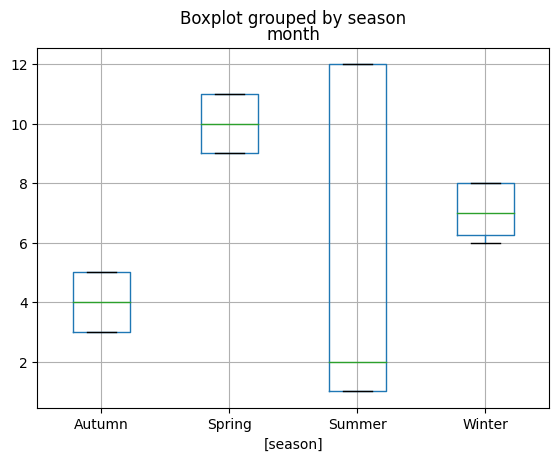

In [40]:
month_season = pd.DataFrame(missing_data['date'].dt.month.to_list(), columns=['month'])
month_season['season'] = missing_data['season'].to_list()
month_season.boxplot(by='season')

In [41]:
print(f"Number of null value: {missing_data['season'].isnull().sum()}")

Number of null value: 10


In [42]:
season_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'season'].isna()[i]]
print(season_nan_checklist)

[2, 76, 110, 132, 135, 173, 209, 310, 335, 442]


In [43]:
for i in season_nan_checklist:
    month = missing_data.loc[i, 'date'].month
    if month in [9, 10, 11] : season = 'Spring'
    elif month in [12, 1, 2] : season = 'Summer'
    elif month in [3, 4, 5] : season = 'Autumn'
    else : season = 'Winter'
    missing_data.loc[i, 'season'] = season

In [44]:
print(f"Number of null value: {missing_data['season'].isnull().sum()}")

Number of null value: 0


# Check for Customer latitude

In [45]:
missing_data['customer_lat'].describe()

count    490.000000
mean     -37.812597
std        0.007593
min      -37.828216
25%      -37.818755
50%      -37.813053
75%      -37.806714
max      -37.788265
Name: customer_lat, dtype: float64

In [46]:
missing_data['customer_lat'].max()

-37.7882653

In [47]:
print(f"Number of null value: {missing_data['customer_lat'].isnull().sum()}")

Number of null value: 10


In [48]:
customer_lat_nan_checklist :list = [i for i in range(len(missing_data)) if missing_data.loc[:,'customer_lat'].isna()[i]]
print(customer_lat_nan_checklist)

[25, 75, 133, 189, 192, 203, 224, 324, 398, 460]


In [49]:
'''
for i in customer_lat_nan_checklist:
    lon1 = missing_data.loc[i, 'customer_long']
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = missing_data.loc[i, 'distance_to_nearest_warehouse']
    lat2 = radians(lat2)
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(missing_data['customer_lat'].max())
    for _ in range(20):
        test_distance = 2 * 6731 * arcsin(sqrt(sin((lat2 - lat1) / 2)**2 +
                                       cos(lat1) * cos(lat2) *
                                       sin((lon2 - lon1) / 2)**2))
        error = test_distance - distance
        if abs(error) < 0.00001:
            break
        lat1 = lat1 - error*0.00005
    lat1 = np.degrees(lat1)
    missing_data.loc[i, 'customer_lat'] = lat1'''
lat_mean = missing_data['customer_lat'].mean()
for i in customer_lat_nan_checklist:
    missing_data.loc[i, 'customer_lat'] = lat_mean

In [50]:
print(f"Number of null value: {missing_data['customer_lat'].isnull().sum()}")

Number of null value: 0


# Check for Cusomter longitude

In [51]:
missing_data['customer_long'].describe()

count    490.000000
mean     144.966114
std        0.021054
min      144.921217
25%      144.951541
50%      144.963409
75%      144.980157
max      145.017015
Name: customer_long, dtype: float64

In [52]:
print(f"Number of null value: {missing_data['customer_long'].isnull().sum()}")

Number of null value: 10


In [53]:
customer_lon_nan_checklist :list = [
    i for i in range(len(missing_data)) 
    if missing_data.loc[:,'customer_long'].isna()[i]]
print(customer_lon_nan_checklist)

[96, 143, 155, 165, 231, 252, 363, 370, 376, 452]


In [54]:
'''
for i in customer_lon_nan_checklist:
    lat1 = missing_data.loc[i, 'customer_lat']
    [lat2, lon2] = warehouses_data.loc[warehouses_data.loc[:, 'names'].to_list().index(missing_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = missing_data.loc[i, 'distance_to_nearest_warehouse']
    lat1 = radians(lat1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    lon1 = radians(missing_data['customer_long'].max())
    for _ in range(35):
        test_distance = 2 * 6731 * arcsin(sqrt(sin((lat2 - lat1) / 2)**2 +
                                       cos(lat1) * cos(lat2) *
                                       sin((lon2 - lon1) / 2)**2))
        error = test_distance - distance
        if abs(error) < 0.00001:
            break
        lon1 = lon1 - error*0.00005
    lon1 = np.degrees(lon1)
    missing_data.loc[i, 'customer_long'] = lon1'''
lon_mean = missing_data['customer_long'].mean()
for i in customer_lon_nan_checklist:
    missing_data.loc[i, 'customer_long'] = lon_mean

In [55]:
print(f"Number of null value: {missing_data['customer_long'].isnull().sum()}")

Number of null value: 0


# Summary

In [56]:
missing_data.isna().sum()

order_id                          0
customer_id                       0
date                              0
nearest_warehouse                 0
shopping_cart                     0
order_price                       0
delivery_charges                  0
customer_lat                      0
customer_long                     0
coupon_discount                   0
order_total                       0
season                            0
is_expedited_delivery             0
distance_to_nearest_warehouse     0
latest_customer_review            0
is_happy_customer                10
dtype: int64

Text(0.5, 1.0, 'distance_to_nearest_warehouse')

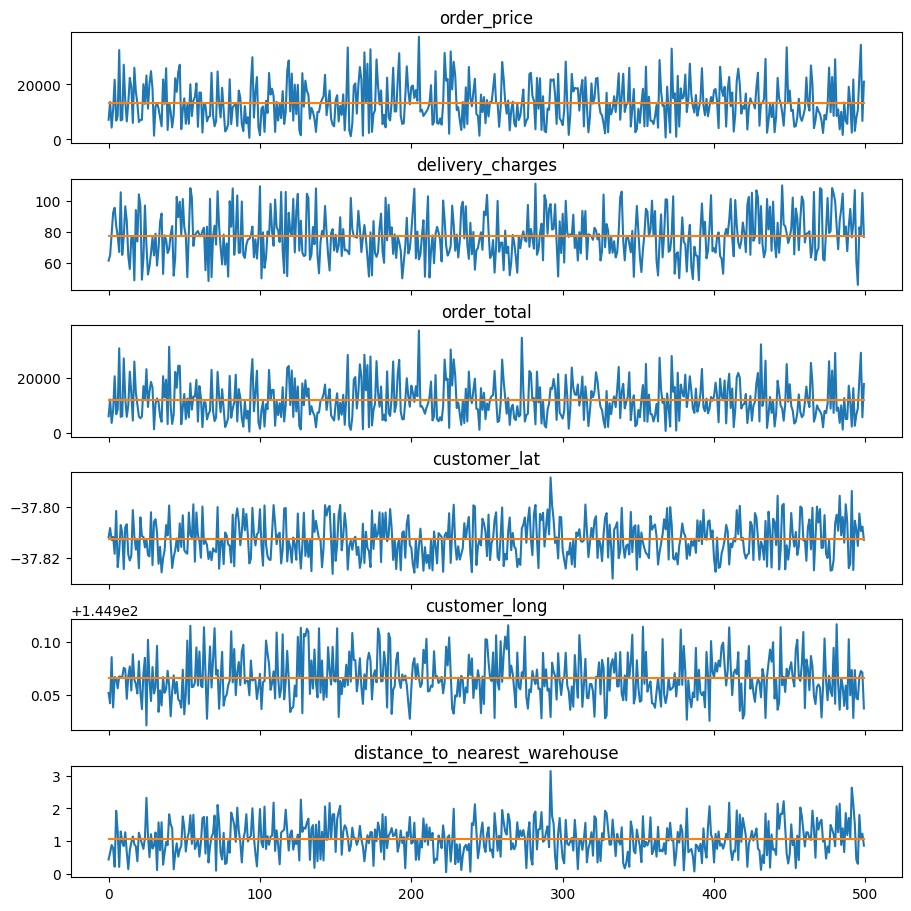

In [57]:
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(6, 1, figsize=(9,9), layout='constrained', sharex=True)
ax0.plot(missing_data['order_price'])
ax0.plot([0,len(missing_data)-1], [missing_data['order_price'].mean(), missing_data['order_price'].mean()])
ax0.set_title('order_price')

ax1.plot(missing_data['delivery_charges'])
ax1.plot([0,len(missing_data)-1], [missing_data['delivery_charges'].mean(), missing_data['delivery_charges'].mean()])
ax1.set_title('delivery_charges')

ax2.plot(missing_data['order_total'])
ax2.plot([0,len(missing_data)-1], [missing_data['order_total'].mean(), missing_data['order_total'].mean()])
ax2.set_title('order_total')

ax3.plot(missing_data['customer_lat'])
ax3.plot([0,len(missing_data)-1], [missing_data['customer_lat'].mean(), missing_data['customer_lat'].mean()])
ax3.set_title('customer_lat')

ax4.plot(missing_data['customer_long'])
ax4.plot([0,len(missing_data)-1], [missing_data['customer_long'].mean(), missing_data['customer_long'].mean()])
ax4.set_title('customer_long')

ax5.plot(missing_data['distance_to_nearest_warehouse'])
ax5.plot([0,len(missing_data)-1], [missing_data['distance_to_nearest_warehouse'].mean(), missing_data['distance_to_nearest_warehouse'].mean()])
ax5.set_title('distance_to_nearest_warehouse')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3299ecb4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3299ecb910>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f3299ecb160>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3299ecbe50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3299a5a130>],
 'means': []}

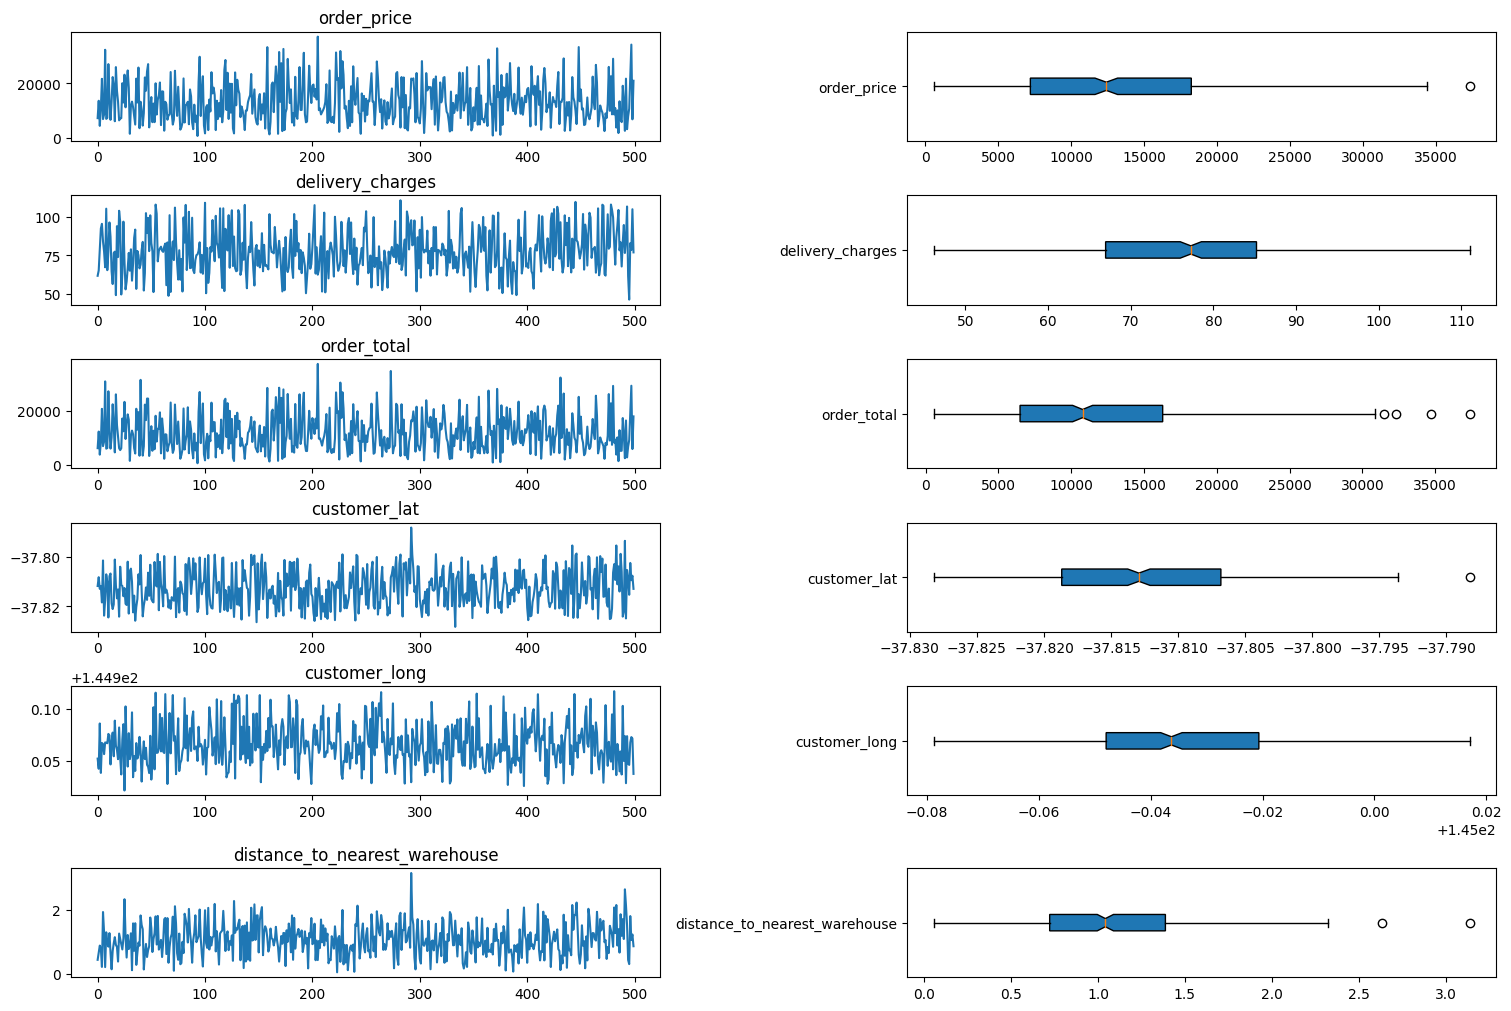

In [58]:
fig = plt.figure(figsize=(15,10), layout='constrained')
gs = GridSpec(nrows=6, ncols=2, figure=fig)
plt.subplot(gs[0,0])
plt.plot(missing_data['order_price'])
plt.title('order_price')

plt.subplot(gs[0,1])
plt.boxplot(missing_data['order_price'], notch=True, vert=False, patch_artist=True, labels=['order_price'])
#plt.title('order_price')

plt.subplot(gs[1,0])
plt.plot(missing_data['delivery_charges'])
plt.title('delivery_charges')

plt.subplot(gs[1,1])
plt.boxplot(missing_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])
#plt.title('delivery_charges')

plt.subplot(gs[2,0])
plt.plot(missing_data['order_total'])
plt.title('order_total')

plt.subplot(gs[2,1])
plt.boxplot(missing_data['order_total'], notch=True, vert=False, patch_artist=True, labels=['order_total'])
#plt.title('order_total')

plt.subplot(gs[3,0])
plt.plot(missing_data['customer_lat'])
plt.title('customer_lat')

plt.subplot(gs[3,1])
plt.boxplot(missing_data['customer_lat'], notch=True, vert=False, patch_artist=True, labels=['customer_lat'])
#plt.title('customer_lat')

plt.subplot(gs[4,0])
plt.plot(missing_data['customer_long'])
plt.title('customer_long')

plt.subplot(gs[4,1])
plt.boxplot(missing_data['customer_long'], notch=True, vert=False, patch_artist=True, labels=['customer_long'])
#plt.title('customer_long')

plt.subplot(gs[5,0])
plt.plot(missing_data['distance_to_nearest_warehouse'])
plt.title('distance_to_nearest_warehouse')

plt.subplot(gs[5,1])
plt.boxplot(missing_data['distance_to_nearest_warehouse'], notch=True, vert=False, patch_artist=True, labels=['distance_to_nearest_warehouse'])
#plt.title('distance_to_nearest_warehouse')

In [59]:
missing_data.to_csv('./clean_data.csv', index=False, header=False, mode='a')